# COS60008 Introduction to Data Science
## Assignment 3, 2024, Semester 1
## Student Details:
* Name: Thi Ngan Ha Do
* Student ID: 103128918
* Email: [Student email](mailto:103128918.student.swin.edu.au)
* Submission Date:
* Tutelab Class: Fri 08:30

## 1.1 Problem Formulation, Data Acquisition and Preparation

#### 1.1.2 Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Replace 'input.asc' with your ASC file path and 'output.csv' with your desired CSV file path
asc = 'SouthGermanCredit.asc'
csv = 'SouthGermanCredit.csv'

# Read the ASC file
df = pd.read_csv(asc, header=None)

#### 1.1.3. Data Preparation

In [ ]:
# Ensure the data is read into a single column and split it
df = df.iloc[:, 0].str.split(' ', expand=True)

# Assign the first row as the header
df.columns = df.iloc[0]
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
# Define the German column names
german_columns = ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate',
                  'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred',
                  'beruf', 'pers', 'telef', 'gastarb', 'kredit']

# Set the appropriate column names (assuming the next row contains the German column names)
df.columns = german_columns

# Dictionary mapping German column names to English variable names
column_mapping = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

# Rename the columns
df = df.rename(columns=column_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   object
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   object
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   object
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]

#Count duplicates
num_duplicates = len(duplicate_rows)

In [ ]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

status                     0
property                   0
foreign_worker             0
telephone                  0
people_liable              0
job                        0
number_credits             0
housing                    0
other_installment_plans    0
age                        0
present_residence          0
duration                   0
other_debtors              0
personal_status_sex        0
installment_rate           0
employment_duration        0
savings                    0
amount                     0
purpose                    0
credit_history             0
credit_risk                0
dtype: int64

In [ ]:
# Convert the quantitative variables to integers
quantitative_vars = ['duration', 'amount', 'age', 'people_liable', 'installment_rate', 'present_residence', 'number_credits']

for var in quantitative_vars:
    df[var] = df[var].astype(int)

In [ ]:
df.describe(include=[object])

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,credit_risk
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,4,2,3,1,3,3,1,3,3,2,3,1,2,1
freq,394,530,280,603,339,548,907,332,814,714,630,596,963,700


In [ ]:
df.describe(include=[np.number])

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,2.845000,35.54200,1.407000,1.845000
std,12.058814,2822.75176,1.118715,1.103718,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,2.000000,27.00000,1.000000,2.000000
50%,18.000000,2319.50000,3.000000,3.000000,33.00000,1.000000,2.000000
75%,24.000000,3972.25000,4.000000,4.000000,42.00000,2.000000,2.000000
max,72.000000,18424.00000,4.000000,4.000000,75.00000,4.000000,2.000000


## 1.2 Exploration

#### 1.2.1 Correlation Analysis
<li>How do different credit histories correlate with credit risk (good or bad), and how does credit amount and duration vary across different credit histories and credit risk categories?</li>

Top correlations with Credit risk:
 credit_risk                1.000000
status                     0.350847
credit_history             0.228785
savings                    0.178943
employment_duration        0.116002
other_installment_plans    0.109844
age                        0.091272
personal_status_sex        0.088184
number_credits             0.045732
telephone                  0.036466
other_debtors              0.025137
housing                    0.018119
present_residence         -0.002967
people_liable             -0.003015
purpose                   -0.017979
job                       -0.032735
installment_rate          -0.072404
foreign_worker            -0.082079
property                  -0.142612
amount                    -0.154740
duration                  -0.214927
Name: credit_risk, dtype: float64


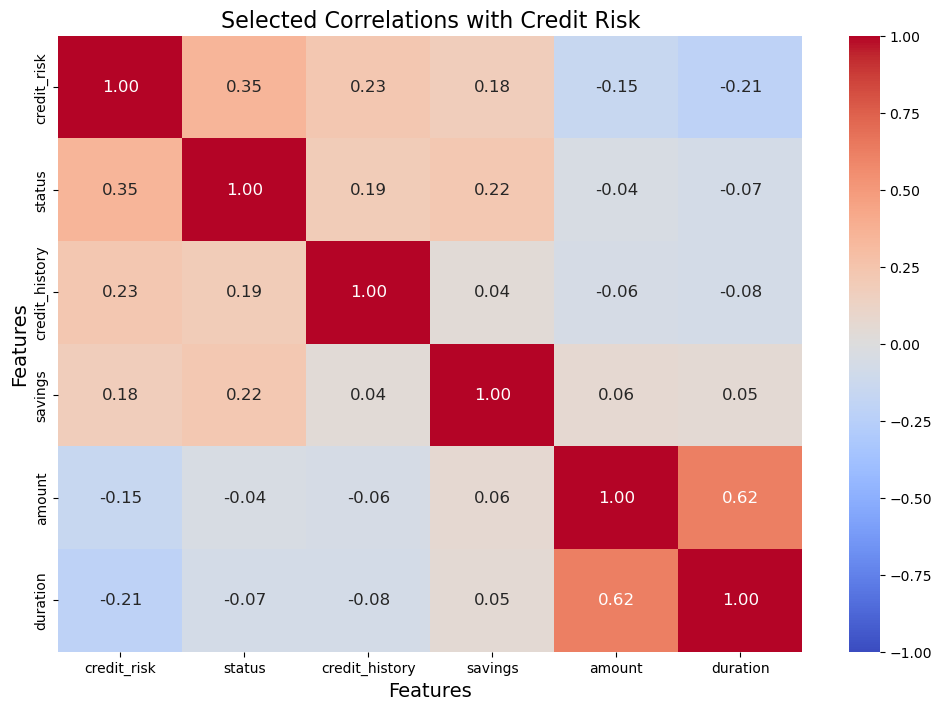

In [ ]:
# Display the correlation with credit_risk
correlations = df.corr()['credit_risk'].sort_values(ascending=False)
print("Top correlations with Credit risk:\n", correlations)

# Select the highest 4 correlations and 2 lowest correlations
top_columns = correlations.index[:4].tolist() + correlations.index[-2:].tolist()

# Create a subset of the correlation matrix with the selected columns
selected_corr_matrix = df[top_columns].corr()

# Setting up the figure size for better visibility
plt.figure(figsize=(12, 8))

# Creating a heatmap with annotations, specifying the color scale range from -1 to 1
sns.heatmap(selected_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12},
            vmin=-1, vmax=1)  # Setting the scale from -1 to 1

# Enhancing the title for clarity and visual appeal
plt.title('Selected Correlations with Credit Risk', fontsize=16)

# Adding labels for axes with increased font size for better readability
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Displaying the enhanced heatmap
plt.show()

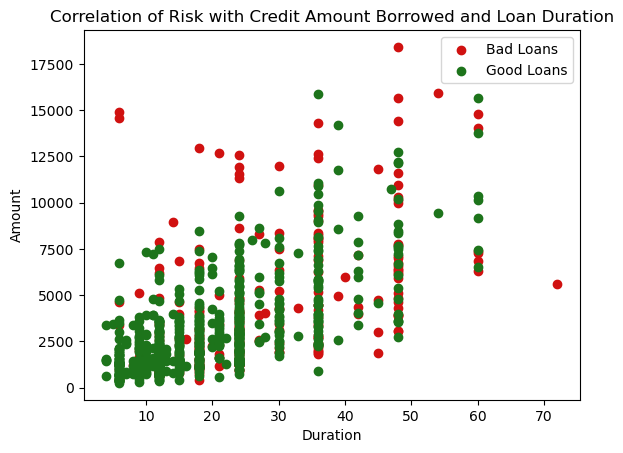

In [ ]:
# Filter data for bad credit risk
bad_data = df[df['credit_risk'] == '0']

# Filter data for good credit risk
good_data = df[df['credit_risk'] == '1']

# Create scatter plot for bad loans
plt.scatter(bad_data['duration'], bad_data['amount'], color='#D01110', label='Bad Loans')

# Create scatter plot for good loans
plt.scatter(good_data['duration'], good_data['amount'], color='#1D741B', label='Good Loans')

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Amount')
plt.title('Correlation of Risk with Credit Amount Borrowed and Loan Duration')

# Display legend
plt.legend()

# Show plot
plt.show()

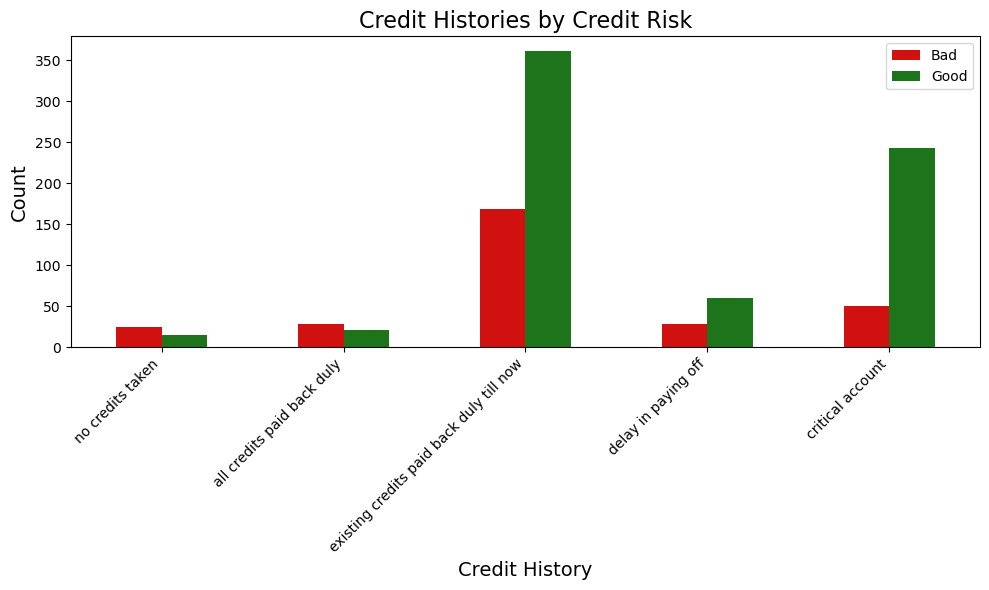

In [ ]:
import matplotlib.pyplot as plt

# Group by credit risk and credit history, and count the occurrences
grouped_data = df.groupby(['credit_history', 'credit_risk']).size().unstack(fill_value=0)

# Plotting the grouped bar chart with custom colors
ax = grouped_data.plot(kind='bar', figsize=(10, 6), color=['#D01110', '#1D741B'])

# Set chart title and axis labels
plt.title('Credit Histories by Credit Risk', fontsize=16)
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set legend title and labels
plt.legend(title='Credit Risk', fontsize=12)
legend_labels = {
    0: 'Bad',
    1: 'Good'
}
for text in ax.legend().texts:
    text.set_text(legend_labels[int(text.get_text())])

# Change x-axis labels to desired values
x_labels = {
    0: 'no credits taken',
    1: 'all credits paid back duly',
    2: 'existing credits paid back duly till now',
    3: 'delay in paying off',
    4: 'critical account'
}
ax.set_xticklabels([x_labels[int(label.get_text())] for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 1.2.2 What are the differences in loan amount distribution between genders, and how does marital status influence loan purposes among different groups?

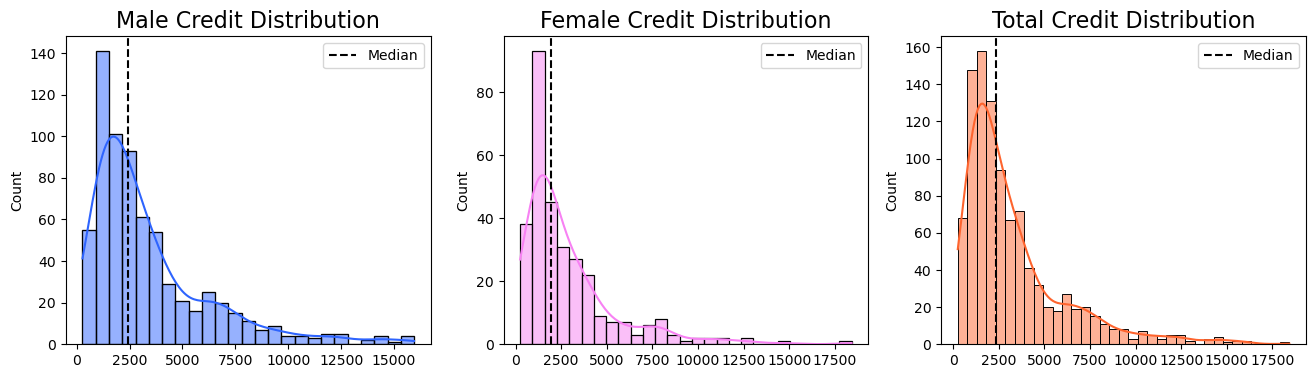

In [ ]:
male_credit = df['amount'].loc[df['personal_status_sex'].isin(['1', '3', '4'])].values
female_credit = df['amount'].loc[df['personal_status_sex'].isin(['2', '5'])].values
total_credit = df['amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# Plot for Male Credit Distribution
sns.histplot(male_credit, kde=True, color="#2E64FE", ax=ax[0])
ax[0].set_title("Male Credit Distribution", fontsize=16)
ax[0].axvline(x=np.median(male_credit), color='black', linestyle='--', label='Median')
ax[0].legend()

# Plot for Female Credit Distribution
sns.histplot(female_credit, kde=True, color="#F781F3", ax=ax[1])
ax[1].set_title("Female Credit Distribution", fontsize=16)
ax[1].axvline(x=np.median(female_credit), color='black', linestyle='--', label='Median')
ax[1].legend()

# Plot for Total Credit Distribution
sns.histplot(total_credit, kde=True, color="#FE642E", ax=ax[2])
ax[2].set_title("Total Credit Distribution", fontsize=16)
ax[2].axvline(x=np.median(total_credit), color='black', linestyle='--', label='Median')
ax[2].legend()

plt.show()

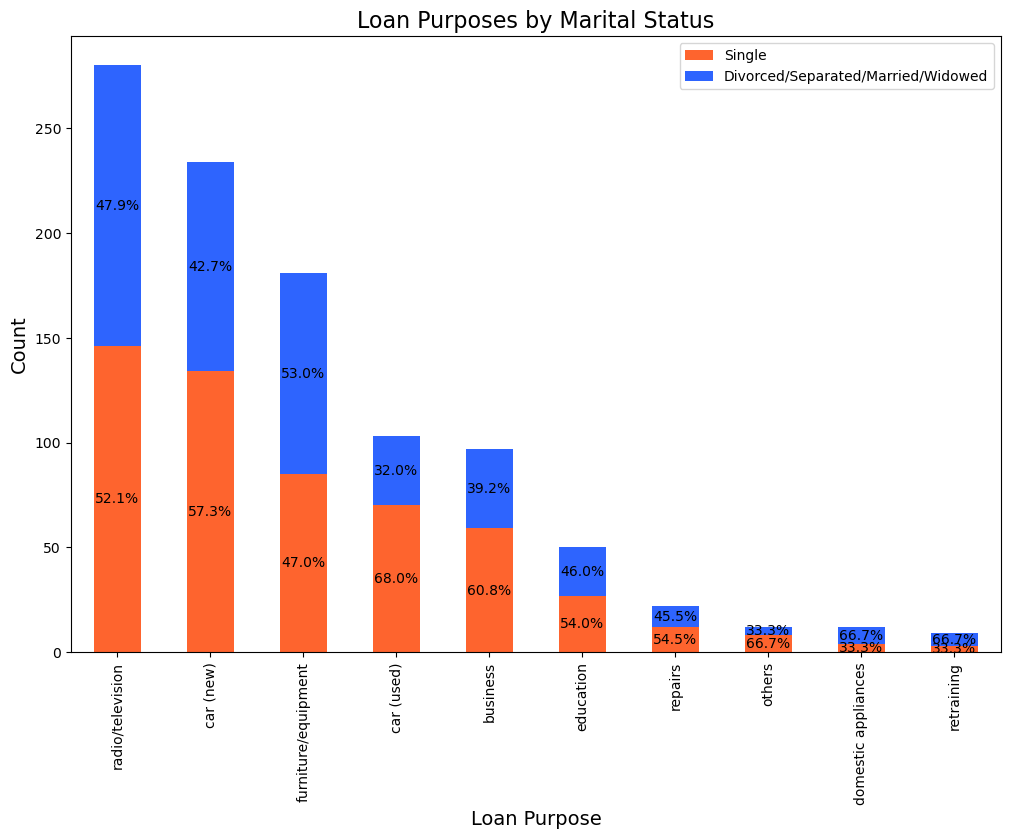

In [ ]:
# Filter for single and non-single groups
single = df.loc[df['personal_status_sex'].isin(['3', '5'])]
non_single = df.loc[df['personal_status_sex'].isin(['1', '2', '4'])]

# Count the occurrences of each loan purpose within these groups
single_counts = single['purpose'].value_counts().sort_index()
non_single_counts = non_single['purpose'].value_counts().sort_index()

# Combine counts into a DataFrame for plotting
combined_counts = pd.DataFrame({'Single': single_counts, 'Non-Single': non_single_counts}).fillna(0)

# Sort the DataFrame by the total counts (sum of 'Single' and 'Non-Single') in descending order
combined_counts['Total'] = combined_counts.sum(axis=1)
combined_counts = combined_counts.sort_values(by='Total', ascending=False)
combined_counts.drop(columns='Total', inplace=True)

# Map purpose codes to text
purpose_map = {
    '0': 'car (new)',
    '1': 'car (used)',
    '2': 'furniture/equipment',
    '3': 'radio/television',
    '4': 'domestic appliances',
    '5': 'repairs',
    '6': 'education',
    '7': 'vacation',
    '8': 'retraining',
    '9': 'business',
    '10': 'others'
}

# Update the index with text labels
combined_counts.index = combined_counts.index.map(purpose_map)

# Calculate percentages
total_per_purpose = combined_counts.sum(axis=1)
single_percentages = (combined_counts['Single'] / total_per_purpose) * 100
non_single_percentages = (combined_counts['Non-Single'] / total_per_purpose) * 100

# Plot the stacked bar chart
ax = combined_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FE642E', '#2E64FE'])
plt.title('Loan Purposes by Marital Status', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Marital Status', fontsize=12)

# Replace the legend labels
legend_labels = {
    'Single': 'Single',
    'Non-Single': 'Divorced/Separated/Married/Widowed'
}
for text in ax.legend().texts:
    text.set_text(legend_labels[text.get_text()])

# Annotate bars with percentages
for i, (single_perc, non_single_perc) in enumerate(zip(single_percentages, non_single_percentages)):
    ax.annotate(f'{single_perc:.1f}%', (i, combined_counts.iloc[i]['Single'] / 2), ha='center', va='center')
    ax.annotate(f'{non_single_perc:.1f}%', (i, combined_counts.iloc[i]['Single'] + combined_counts.iloc[i]['Non-Single'] / 2), ha='center', va='center')

plt.show()

#### 1.2.3 How does the distribution of loan amounts vary across different age groups and credit risk categories, and does this distribution support the hypothesis that younger people are riskier to lend to?

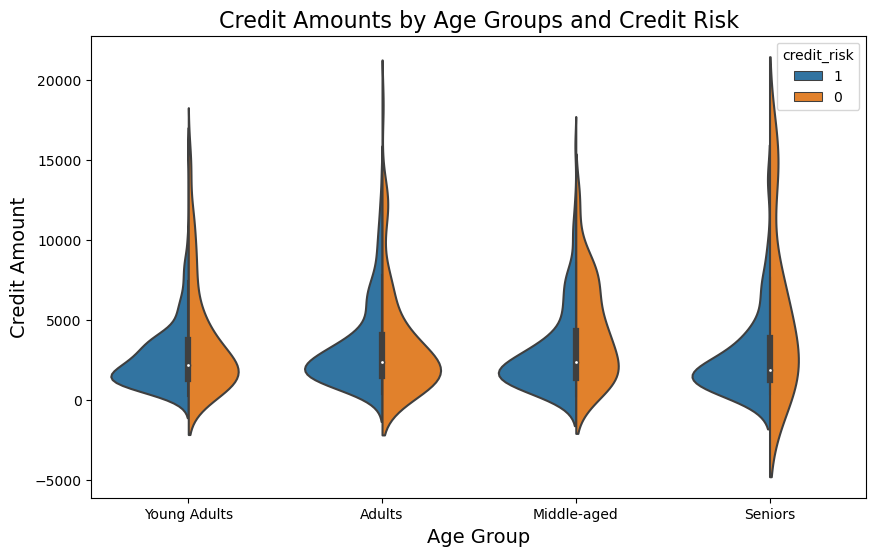

In [ ]:
# Define the bins and labels
bins = [18, 30, 40, 55, float('inf')]
labels = ['Young Adults', 'Adults', 'Middle-aged', 'Seniors']

df1 = df.copy()

# Bin the 'age' column into groups with logical names
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='amount', hue='credit_risk', data=df1, split=True)
plt.title('Credit Amounts by Age Groups and Credit Risk', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Credit Amount', fontsize=14)
plt.show()

In [ ]:
# Calculate the percentage of default for each age group
default_percentage = pd.crosstab(df1['age_group'], df1['credit_risk'], normalize='index') * 100

print("Percentage of Credit Risk by Age Group:")
print(default_percentage)

Percentage of Credit Risk by Age Group:
credit_risk           0          1
age_group                         
Young Adults  37.127371  62.872629
Adults        25.602410  74.397590
Middle-aged   25.454545  74.545455
Seniors       27.848101  72.151899


In [ ]:
from scipy.stats import ttest_ind

# Define higher and lower customer value groups
older = df[df['age'] >= df['age'].median()]
younger = df[df['age'] < df['age'].median()]

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(younger['credit_risk'], older['credit_risk'])

# Print the null hypothesis and which one to reject based on the p-value
null_hypothesis = "There is no significant difference in credit risk between younger and older people."
if p_value < 0.05:
    conclusion = "Reject the null hypothesis. There is evidence that younger people are riskier to lend to."
else:
    conclusion = "Fail to reject the null hypothesis. There is no evidence that younger people are riskier to lend to."

print(f"T-test Statistic: {t_statistic}")
print(f"P-value: {p_value}")
print("Conclusion:", conclusion)

T-test Statistic: -3.2876599620444895
P-value: 0.0010454922591646531
Conclusion: Reject the null hypothesis. There is evidence that younger people are riskier to lend to.


## 1.3 Modelling

#### 1.3.1 Feature Engineering

In [ ]:
#Label encoding

def object_to_int(dataframe_series):
    # Check if the data type of the series is 'object'
    if dataframe_series.dtype == 'object':
        # If the data type is 'object', transform it to integer using LabelEncoder
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

#Apply the object_to_int function to each column in the DataFrame
df = df.apply(lambda x: object_to_int(x))

#Display the first few rows of the DataFrame after transformation
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,4,3,1049,0,1,4,1,0,...,1,21,2,0,1,2,2,0,1,1
1,0,9,4,0,2799,0,2,2,2,0,...,0,36,2,0,2,2,1,0,1,1
2,1,12,2,9,841,1,3,2,1,0,...,0,23,2,0,1,1,2,0,1,1
3,0,12,4,0,2122,0,2,3,2,0,...,0,39,2,0,2,1,1,0,0,1
4,0,12,4,0,2171,0,2,4,2,0,...,1,38,0,1,2,1,2,0,0,1


#### 1.3.2 Data Preprocessing

In [ ]:
# Feature matrix
X = df.drop(columns=['credit_risk'])
# Target vector
y = df['credit_risk'].values

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

In [ ]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### 1.3.3 Hyperparameter Tuning and Cross Validation

Model 1: Random Forest

In [ ]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=11)

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initiate StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# Grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=skf, scoring='recall')
grid_search_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
# Best parameters and cross-validation recall
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation recall: {grid_search_rf.best_score_:.4f}")

# Evaluate on the test set
y_pred = grid_search_rf.predict(X_test_pca)
recall = recall_score(y_test, y_pred)
print(f"Test recall: {recall:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation recall: 0.8679
Test recall: 0.8643
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.70       200

Confusion Matrix:
[[ 23  37]
 [ 19 121]]


Model 2: KNN

In [ ]:
#Instantiate KNN Classifier
knn = KNeighborsClassifier()

# Define parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
}

# Initiate StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# Grid search with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=skf, scoring='recall')
grid_search_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [ ]:
# Best parameters and cross-validation recall
print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Best cross-validation recall: {grid_search_knn.best_score_:.4f}")

# Evaluate on the test set
y_pred_knn = grid_search_knn.predict(X_test_pca)
recall_knn = recall_score(y_test, y_pred_knn)
print(f"Test recall: {recall_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Best parameters: {'n_neighbors': 15}
Best cross-validation recall: 0.8946
Test recall: 0.8643
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        60
           1       0.75      0.86      0.80       140

    accuracy                           0.70       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.67      0.70      0.68       200

Confusion Matrix:
[[ 19  41]
 [ 19 121]]


#### 1.3.4 Data Modelling

Model 1: Random Forest

In [ ]:
# Train the Random Forest model

# Best parameters for Random Forest
best_params_rf = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}

# Instantiate the Random Forest model with the best parameters
rf_best = RandomForestClassifier(max_depth=best_params_rf['max_depth'],
                                 min_samples_split=best_params_rf['min_samples_split'],
                                 n_estimators=best_params_rf['n_estimators'],
                                 random_state=11)

In [ ]:
# Fit the Random Forest model on the training data
rf_best.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_rf = rf_best.predict(X_test_pca)

In [ ]:
# Compute performance metrics for Random Forest
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_score_rf = metrics.f1_score(y_test, y_pred_rf)

# Print performance metrics for Random Forest
print("Random Forest Performance Metrics:")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")

NameError: name 'metrics' is not defined

Model 2: KNN

In [ ]:
#Train the KNN model
knn_best = KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Fit the KNN model on the training data
knn_best.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_knn = knn_best.predict(X_test_pca)

In [ ]:
# Compute performance metrics for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

# Print performance metrics for KNN
print("KNN Performance Metrics:")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_score_knn:.4f}")

### 1.3.5 Comparative Analysis of Classification Models

In [ ]:
# Plot confusion matrix heatmap for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#Performance metrics for Random Forest
rf_metrics = {
    'Accuracy': 0.7250,
    'Precision': 0.7673,
    'Recall': 0.8714,
    'F1 Score': 0.8160
}

#Performance metrics for KNN
knn_metrics = {
    'Accuracy': 0.7100,
    'Precision': 0.7500,
    'Recall': 0.8786,
    'F1 Score': 0.8092
}

#Extract metric names and values
metrics = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
knn_values = list(knn_metrics.values())

# Set position of bar on X axis
r1 = range(len(metrics))
r2 = [x + 0.35 for x in r1]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, rf_values, color='#ff6666', width=0.35, edgecolor='grey', label='Random Forest')
plt.bar(r2, knn_values, color='#66b3ff', width=0.35, edgecolor='grey', label='KNN')
plt.xlabel('Performance Metrics', fontweight='bold')
plt.xticks([r + 0.35/2 for r in range(len(metrics))], metrics)
plt.ylabel('Score', fontweight='bold')
plt.title('Comparison of Classification Models')
plt.legend()

# Add values on top of each bar
for i, value in enumerate(rf_values):
    plt.text(i, value, str(value), ha='center', va='bottom')
for i, value in enumerate(knn_values):
    plt.text(i + 0.35, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

In [ ]:
# Predict probabilities for KNN
y_pred_prob_knn = knn_best.predict_proba(X_test_pca)

# Predict probabilities for Random Forest
y_pred_prob_rf = rf_best.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn[:, 1])

# Compute precision-recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label='KNN')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()